In [84]:
from itertools import islice
import pandas as pd
import numpy as np
from scipy import stats
from  qgrid import show_grid as show 
import plotly.express as px
import math
import seaborn as sns
from matplotlib import pyplot as plt 
import matplotlib as mpl
from matplotlib.lines import Line2D 
# pd.options.plotting.backend = "plotly"
pd.options.plotting.backend ='matplotlib'

mpl.rcParams['boxplot.boxprops.color'] ='white'
mpl.rcParams['boxplot.boxprops.linewidth']=2
mpl.rcParams['patch.edgecolor']='k'
mpl.rcParams['boxplot.patchartist']= "True"
mpl.rcParams['boxplot.flierprops.marker'] = 'o'
mpl.rcParams['boxplot.flierprops.color'] = 'k'
mpl.rcParams['boxplot.flierprops.markerfacecolor'] = "white"
mpl.rc('xtick', labelsize=22) 
mpl.rc('ytick', labelsize=22) 
mpl.rcParams['text.usetex'] = True

In [18]:
jvms=(

    "15.0.1.j9-adpt",
    "15.0.1.hs-adpt",
    "14.0.2.j9-adpt",
    "14.0.2.hs-adpt",
    "13.0.2.j9-adpt",
    "13.0.2.hs-adpt",
    "12.0.2.j9-adpt",
    "12.0.2.hs-adpt",
    "11.0.9.j9-adpt",
    "11.0.9.hs-adpt",
    "8.0.275.j9-adpt",
    "8.0.275.hs-adpt",
    "11.0.8-albba",
    "8u272-albba",
    "15.0.1-amzn",
    "11.0.9-amzn",
    "8.0.275-amzn",
    "15.0.1-zulu",
    "14.0.2-zulu",
    "13.0.5-zulu",
    "12.0.2-zulu",
    "11.0.9-zulu",
    "10.0.2-zulu",
    "9.0.7-zulu",
    "8.0.272-zulu",
    "15.0.1-librca",
    "14.0.2-librca",
    "13.0.2-librca",
    "12.0.2-librca",
    "11.0.9-librca",
    "8.0.275-librca",
    "20.2.0.r11-grl",
    "20.2.0.r8-grl",
    "19.3.4.r11-grl",
    "19.3.4.r8-grl",
    "16.ea.24-open",
    "15.0.1-open",
    "14.0.2-open",
    "13.0.2-open",
    "12.0.2-open",
    "11.0.2-open",
    "10.0.2-open",
    "9.0.4-open",
    "8.0.265-open",
    "20.2.0.0-mandrel",
    "15.0.1-sapmchn",
    "14.0.2-sapmchn",
    "13.0.2-sapmchn",
    "12.0.2-sapmchn",
    "11.0.9-sapmchn",
    "11.0.9-trava",
    "8.0.232-trava",
)

jvm_order={jvms[i]:i for i in range(len(jvms))}

def get_filling_color(text): 
    j9 = ["15.0.1.j9-adpt", "14.0.2.j9-adpt", "13.0.2.j9-adpt", "12.0.2.j9-adpt", "11.0.9.j9-adpt","8.0.275.j9-adpt"]
    graal = ["20.2.0.r11-grl", "20.2.0.r8-grl", "19.3.4.r11-grl", "19.3.4.r8-grl"]
    openjdk = ["15.0.1-open","14.0.2-open","13.0.2-open","12.0.2-open","11.0.2-open","10.0.2-open","9.0.4-open","8.0.265-open"]
    if text in j9 : 
        return "#3498DB"
    if text in graal : 
        return "#16A085"
    if text in openjdk : 
        return "#F0B27A"
    return "white"

In [19]:

def parse_log(file_name):

    def slice_log(lines,i,offset=14):
        l=list(islice(lines,i*offset,(i+1)*offset))
        x={}
        x["jvm"],x["benchmark"],x["iteration"]=l[1].strip().split("_")
        x['iteration']=int(x['iteration'])
        x["energy_pkg"]=float(l[7].strip().split(" ")[0].replace(",",""))
        x["energy_core"]=float(l[8].strip().split(" ")[0].replace(",",""))
        x["energy_dram"]=float(l[9].strip().split(" ")[0].replace(",",""))
        x["execution_time"]=float(l[12].strip().split(" ")[0].replace(",",""))
        x["av_power_pkg"]=x["energy_pkg"]/x["execution_time"]
        return x
    
    with open(file_name,'r') as f :
        x=f.readline()
        offset=1
        for line in f.readlines(): 
            if line == x : 
                break 
            offset=offset+1
        f.seek(0)
        lines = f.readlines()
        limit=len(lines)//offset
        l=[slice_log(lines,i,offset) for i in range(0,limit)]
        data=pd.DataFrame(l)
        return data
    

In [56]:
df=parse_log("report4.logs")
df["jvm-group"]=df["jvm"].apply(lambda x : x.split(".")[-1])


FileNotFoundError: [Errno 2] No such file or directory: 'report4.logs'

In [21]:

def plot_pkg_energy(df,benchmark,machine="",save=False):
    title=f"Energy consumption of the benchmark {benchmark} within different JVMs"
    fig, axes = plt.subplots(1, 1, figsize=(32, 14))

    fig=df.loc[df["benchmark"]==benchmark].boxplot(by="jvm",column="energy_pkg",ax=axes,rot=-90,return_type="both",showfliers=False)

    fig[0].ax.set_ylabel(ylabel="Energy Consumption (J)",labelpad=22,fontsize="30")
    fig[0].ax.get_figure().suptitle('')
    fig[0].ax.set_xlabel(xlabel='')
    ########## legends 
    legends=[Line2D([0], [0], marker='o', color='k', label='J9',
                          markerfacecolor='#3498DB', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='GraalVM',
                          markerfacecolor='#16A085', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='OpenJDK',
                          markerfacecolor='#F0B27A', markersize=30),
            Line2D([0], [0], marker='o', color='k', label='Others',
                          markerfacecolor='w', markersize=30)
            ]
    
    fig[0].ax.legend(handles=legends, loc='lower left',fontsize='xx-large',labelspacing=1)
    
    ############## inside the boxplots 
    for i in range(len(fig[0][1]['boxes'])): 
        color = get_filling_color(fig[0][0].get_xticklabels()[i].get_text())
        fig[0][1]['boxes'][i].set(color="b",edgecolor='black',facecolor=color,linewidth=1)
        fig[0][1]['medians'][i].set(color="red",linewidth=0.5)
        fig[0][1]['whiskers'][i].set(color="black",linewidth=1)
    
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    if save :
        fig[0].ax.set_title("",fontsize="30",pad=50  )
        plt.savefig(f"energy_pkg_all_{benchmark}{machine}.pdf",format="pdf")
    else:
        fig[0].ax.set_title(title,fontsize="30",pad=50  )
        plt.show()
    return fig

def plot_execution_time(df,benchmark,machine="",save=False):
    title=f"Excution time of the benchmark {benchmark} within different JVMs"
    fig, axes = plt.subplots(1, 1, figsize=(32, 12))
#     plt.subplots_adjust(wspace=0.25,top=4,left = 0,right = 1)
    fig=df.loc[df["benchmark"]==benchmark].boxplot(by="jvm",column="execution_time",ax=axes,rot=-90,return_type="both",showfliers=False)

    
    fig[0].ax.set_ylabel(ylabel="Execution time (s)",labelpad=22,fontsize="30")
    fig[0].ax.get_figure().suptitle('')
    fig[0].ax.set_xlabel(xlabel='')
    
    legends=[Line2D([0], [0], marker='o', color='k', label='J9',
                          markerfacecolor='#3498DB', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='GraalVM',
                          markerfacecolor='#16A085', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='OpenJDK',
                          markerfacecolor='#F0B27A', markersize=30),
            Line2D([0], [0], marker='o', color='k', label='Others',
                          markerfacecolor='w', markersize=30)
            
            ]
    
    fig[0].ax.legend(handles=legends, loc='lower left',fontsize='xx-large',labelspacing=1)
    
    for i in range(len(fig[0][1]['boxes'])): 
        color = get_filling_color(fig[0][0].get_xticklabels()[i].get_text())
        fig[0][1]['boxes'][i].set(color="b",edgecolor='black',facecolor=color,linewidth=1)
        fig[0][1]['medians'][i].set(color="red",linewidth=0.5)
        fig[0][1]['whiskers'][i].set(color="black",linewidth=1)
    if save :
        fig[0].ax.set_title("",fontsize="30",pad=50  )
        plt.savefig(f"execution_time_all_{benchmark}{machine}.pdf",format="pdf")
    else:
        fig[0].ax.set_title(title,fontsize="30",pad=50  )
        plt.show()
    return fig


def plot_dram_energy(df,benchmark,machine="",save=False):
    title=f"DRAM Energy consumption of the benchmark {benchmark} within different JVMs"
    fig, axes = plt.subplots(1, 1, figsize=(32, 12))
    plt.tight_layout()
    
    fig=df.loc[df["benchmark"]==benchmark].boxplot(by="jvm",column="energy_dram",ax=axes,rot=-90,return_type="both",showfliers=False)


    
    fig[0].ax.set_ylabel(ylabel="Energy Consumption (J)",labelpad=22,fontsize="30")
    fig[0].ax.get_figure().suptitle('')
    fig[0].ax.set_xlabel(xlabel='')
    ########## legends 
    legends=[Line2D([0], [0], marker='o', color='k', label='J9',
                          markerfacecolor='#3498DB', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='GraalVM',
                          markerfacecolor='#16A085', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='OpenJDK',
                          markerfacecolor='#F0B27A', markersize=30),
            Line2D([0], [0], marker='o', color='k', label='Others',
                          markerfacecolor='w', markersize=30)
            ]
    
    fig[0].ax.legend(handles=legends, loc='upper left',fontsize='xx-large',labelspacing=1)
    
    ############## inside the boxplots 
    for i in range(len(fig[0][1]['boxes'])): 
        color = get_filling_color(fig[0][0].get_xticklabels()[i].get_text())
        fig[0][1]['boxes'][i].set(color="b",edgecolor='black',facecolor=color,linewidth=1)
        fig[0][1]['medians'][i].set(color="red",linewidth=0.5)
        fig[0][1]['whiskers'][i].set(color="black",linewidth=1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    if save :
        fig[0].ax.set_title("",fontsize="30",pad=50  )
        plt.savefig(f"energy_dram_all_{benchmark}{machine}.pdf",format="pdf")
    else:
        fig[0].ax.set_title(title,fontsize="30",pad=50  )
        plt.show()
    return fig


def plot_pkg_power(df,benchmark,machine="",save=False):
    title=f"DRAM Energy consumption of the benchmark {benchmark} within different JVMs"
    fig, axes = plt.subplots(1, 1, figsize=(32, 12))
    
    fig=df.loc[df["benchmark"]==benchmark].boxplot(by="jvm",column="av_power_pkg",ax=axes,rot=-90,return_type="both",showfliers=False)


    
    fig[0].ax.set_ylabel(ylabel="Average Power Consumption (W)",labelpad=22,fontsize="30")
    fig[0].ax.get_figure().suptitle('')
    fig[0].ax.set_xlabel(xlabel='')
    ########## legends 
    legends=[Line2D([0], [0], marker='o', color='k', label='J9',
                          markerfacecolor='#3498DB', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='GraalVM',
                          markerfacecolor='#16A085', markersize=30),
        Line2D([0], [0], marker='o', color='k', label='OpenJDK',
                          markerfacecolor='#F0B27A', markersize=30),
            Line2D([0], [0], marker='o', color='k', label='Others',
                          markerfacecolor='w', markersize=30)
            ]
    
    fig[0].ax.legend(handles=legends, loc='upper left',fontsize='xx-large',labelspacing=1)
    
    ############## inside the boxplots 
    for i in range(len(fig[0][1]['boxes'])): 
        color = get_filling_color(fig[0][0].get_xticklabels()[i].get_text())
        fig[0][1]['boxes'][i].set(color="b",edgecolor='black',facecolor=color,linewidth=1)
        fig[0][1]['medians'][i].set(color="red",linewidth=0.5)
        fig[0][1]['whiskers'][i].set(color="black",linewidth=1)
    if save :
        fig[0].ax.set_title("",fontsize="30",pad=50  )
        plt.savefig(f"pwoer_pkg_all_{benchmark}{machine}.pdf",format="pdf")
    else:
        fig[0].ax.set_title(title,fontsize="30",pad=50  )
        plt.show()
    return fig



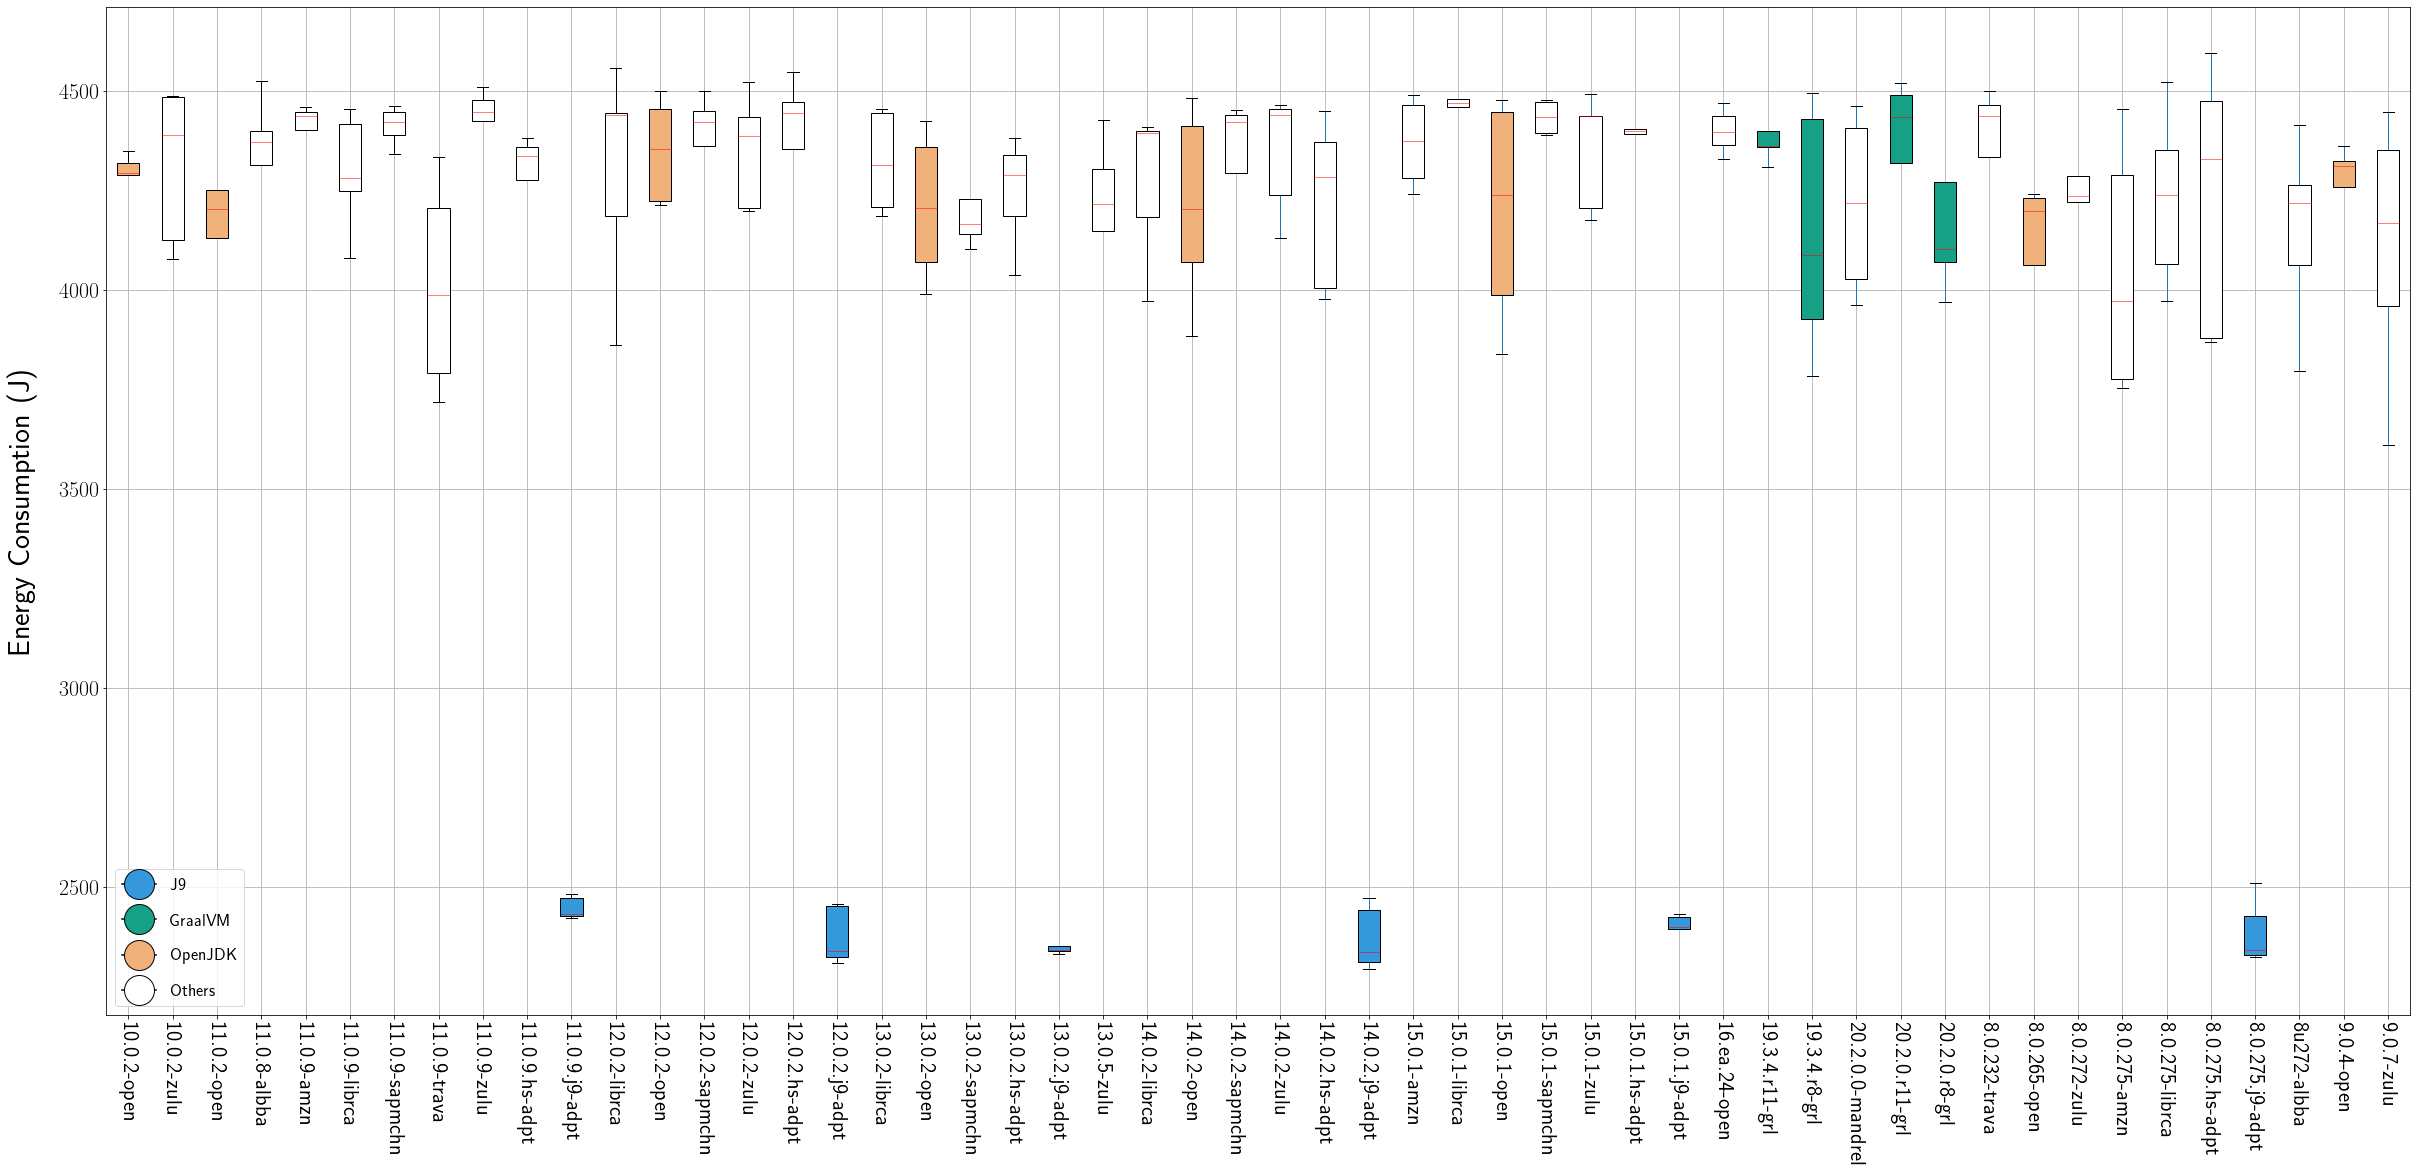

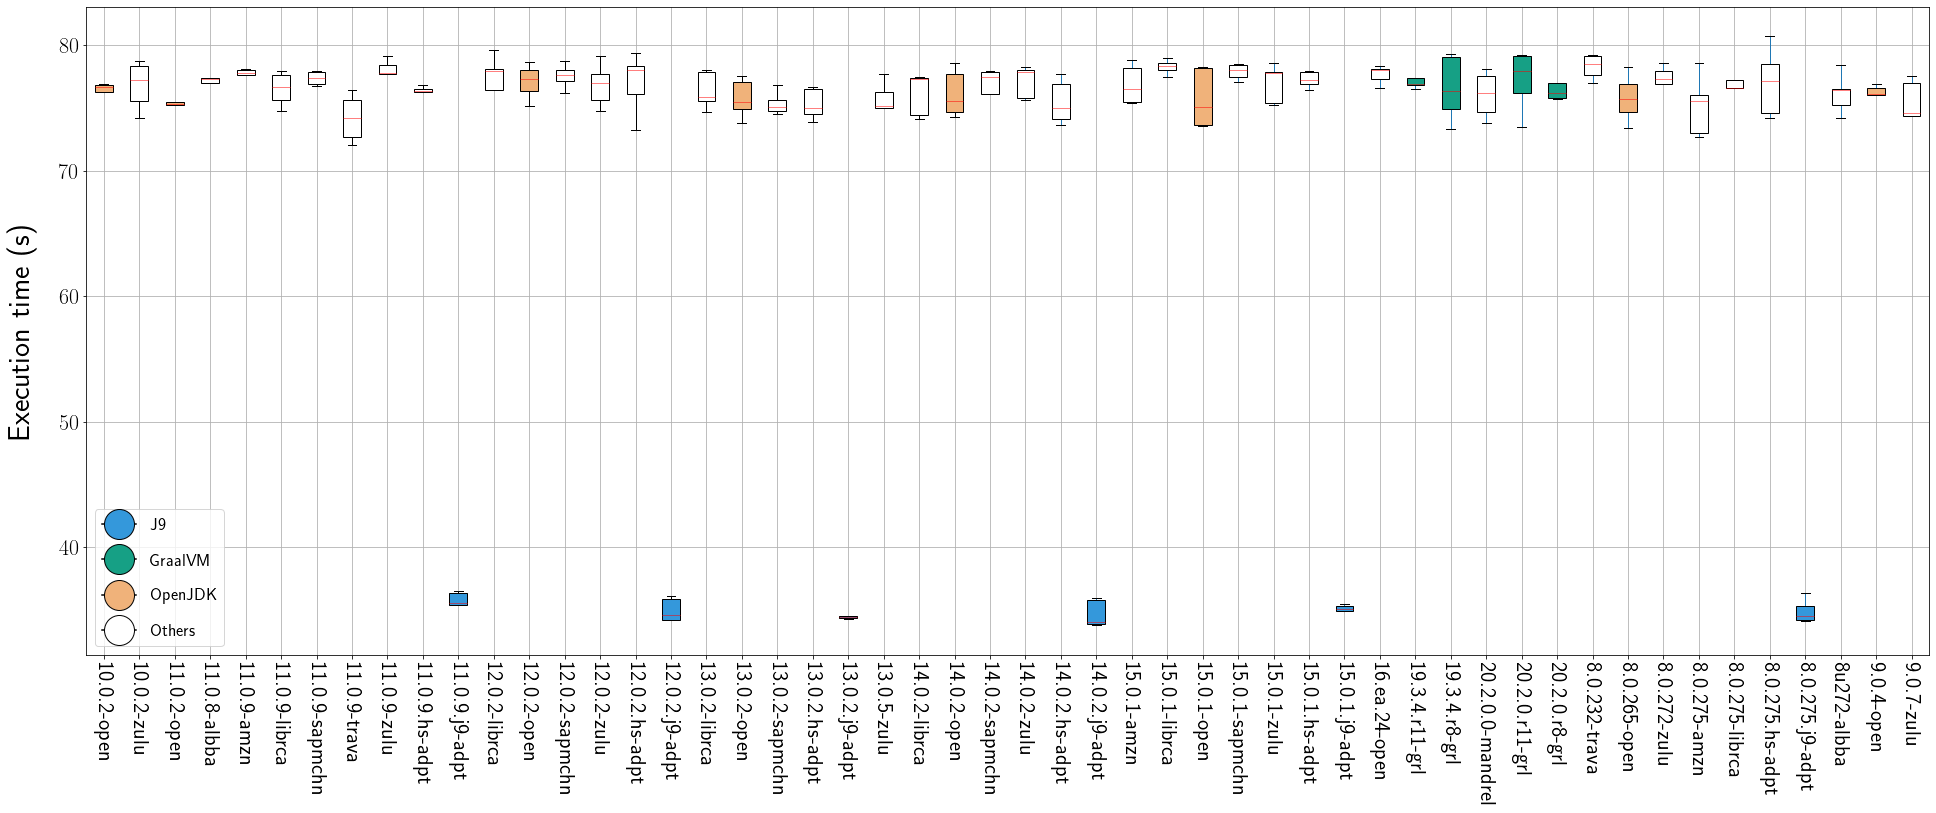

In [59]:
data_avrora=parse_log("reports-chetemi8.logs")
_=plot_pkg_energy(data_avrora,"avrora",machine="chetemi-8",save=True)
_=plot_execution_time(data_avrora,"avrora",machine="chetemi-8",save=True)

In [60]:
data_avrora

,jvm,benchmark,iteration,energy_pkg,energy_core,energy_dram,execution_time,av_power_pkg
0,15.0.1.j9-adpt,avrora,1,2399.70,0.0,478.90,35.102394,68.362859
1,15.0.1.hs-adpt,avrora,1,4394.08,0.0,1026.47,77.842235,56.448533
2,14.0.2.j9-adpt,avrora,1,2311.86,0.0,458.43,33.937673,68.120758
3,14.0.2.hs-adpt,avrora,1,4372.03,0.0,1009.32,76.869136,56.876273
4,13.0.2.j9-adpt,avrora,1,2332.01,0.0,462.91,34.308770,67.971250
...,...,...,...,...,...,...,...,...
246,13.0.2-open,avrora,5,3990.99,0.0,965.49,73.751941,54.113694
247,12.0.2-open,avrora,5,4225.20,0.0,996.56,76.316737,55.364002
248,11.0.2-open,avrora,5,4252.53,0.0,984.43,75.214576,56.538642
249,10.0.2-open,avrora,5,4294.87,0.0,1006.12,76.865194,55.875355


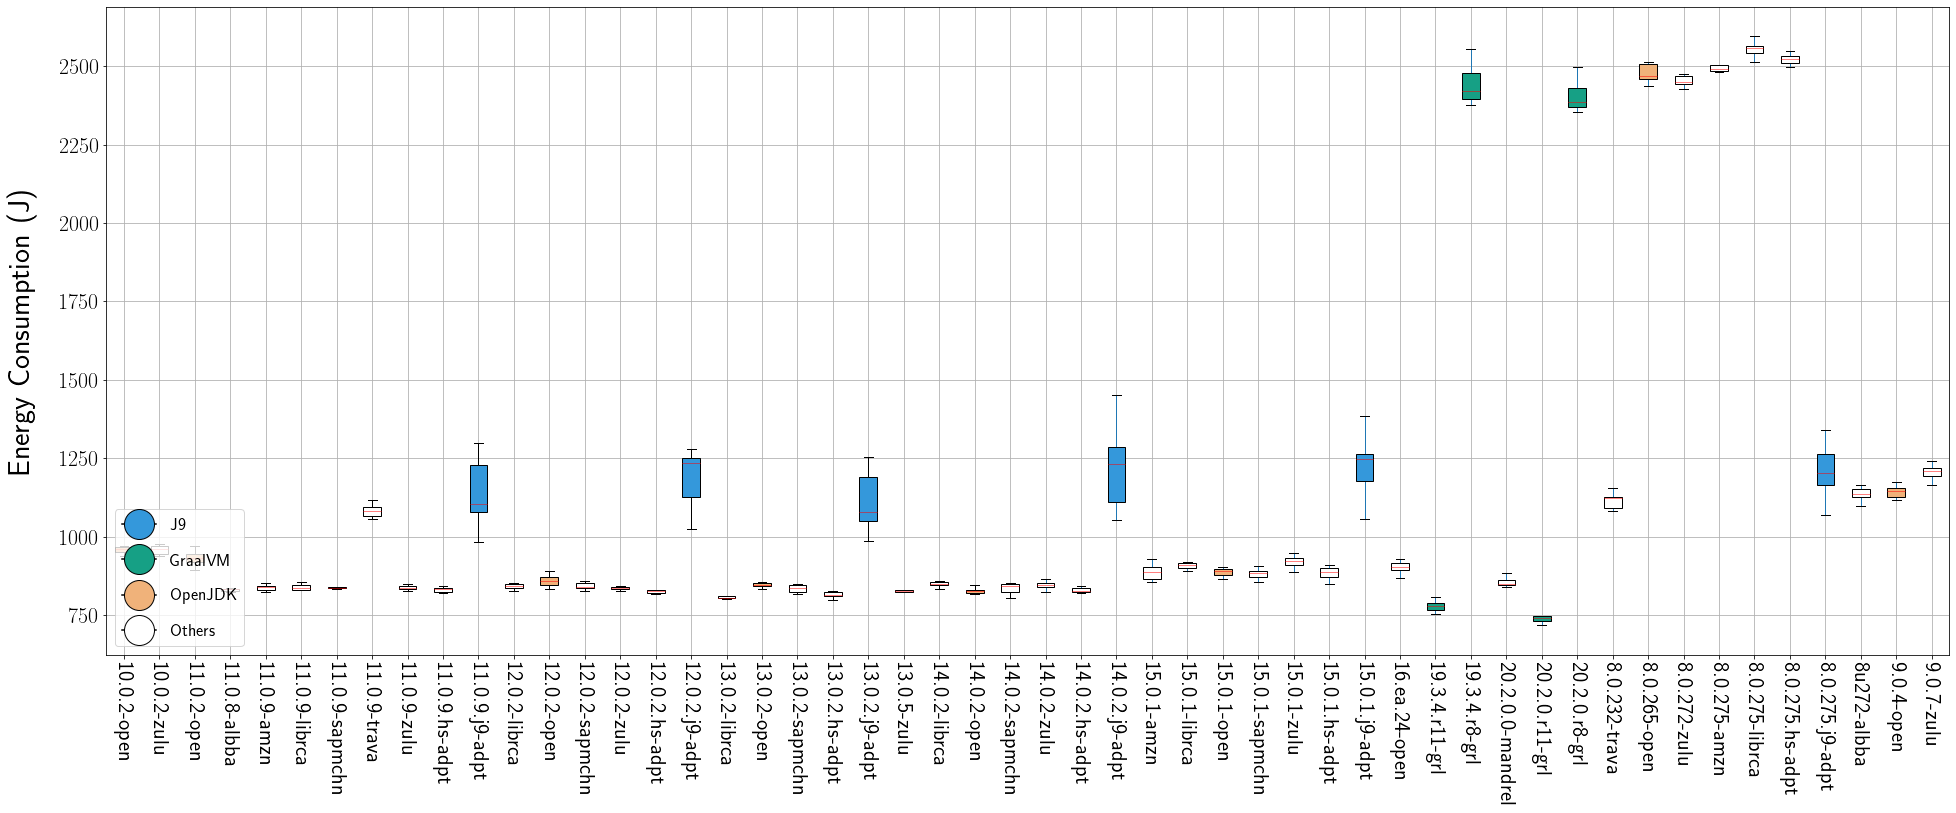

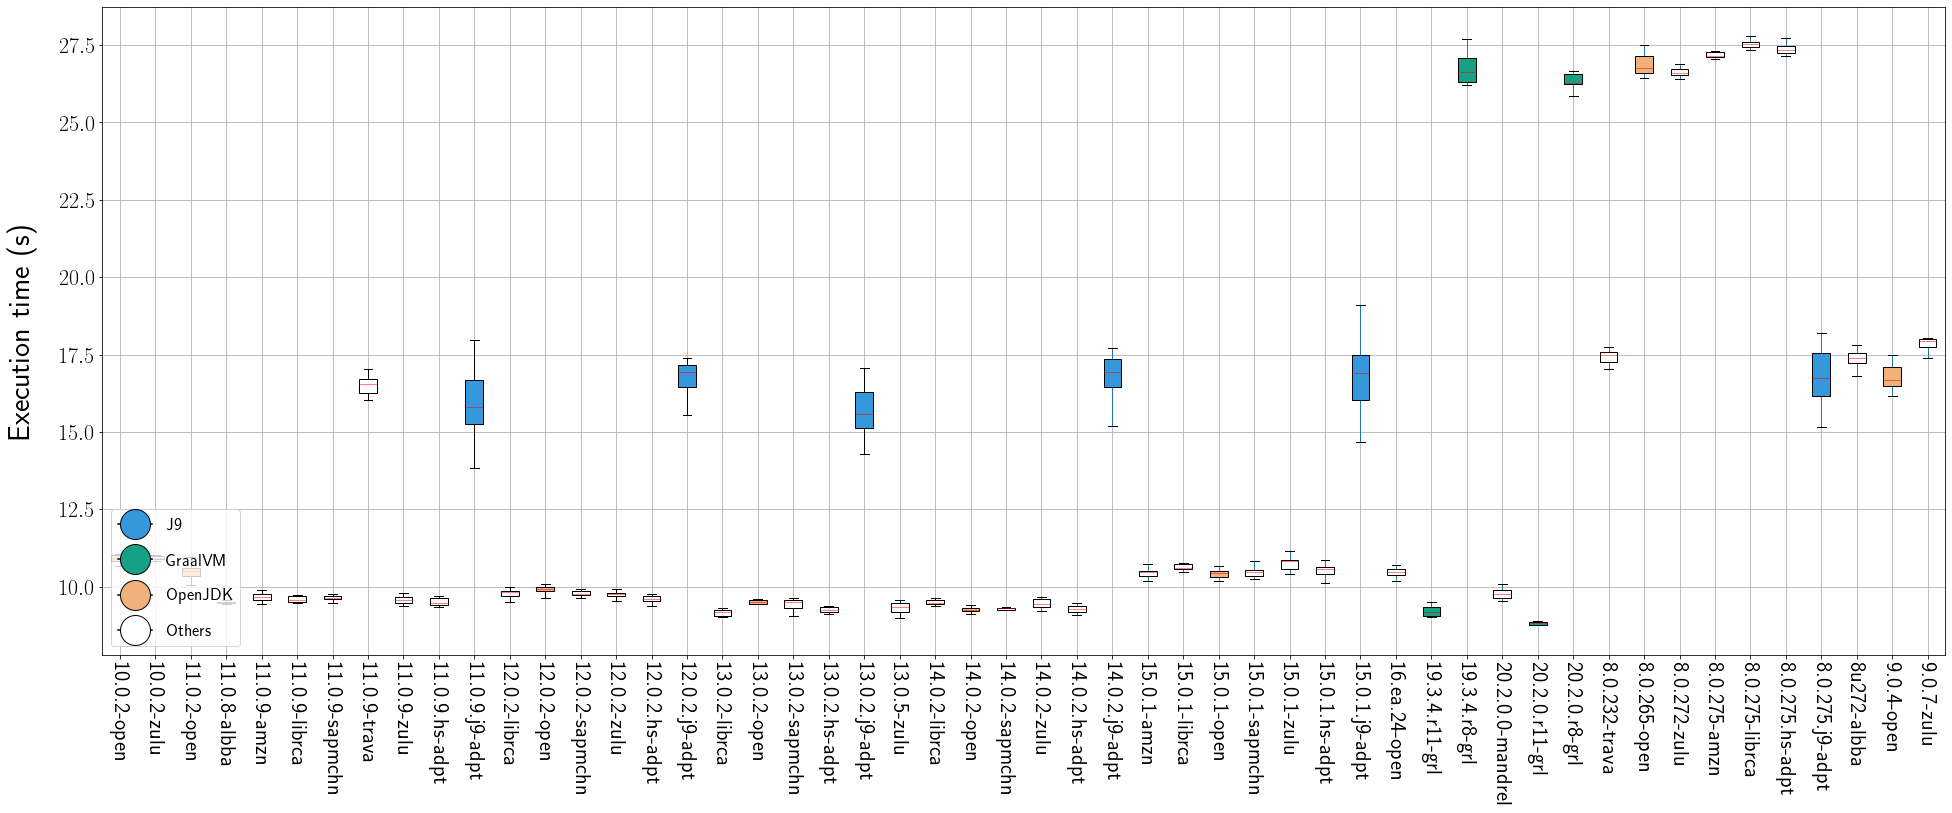

In [41]:
data_scrables=parse_log("report-scrable-chetemi-8.logs")
_=plot_pkg_energy(data_scrables,"scrabble",machine="chetemi-8",save=True)
_=plot_execution_time(data_scrables,"scrabble",machine="chetemi-8",save=True)

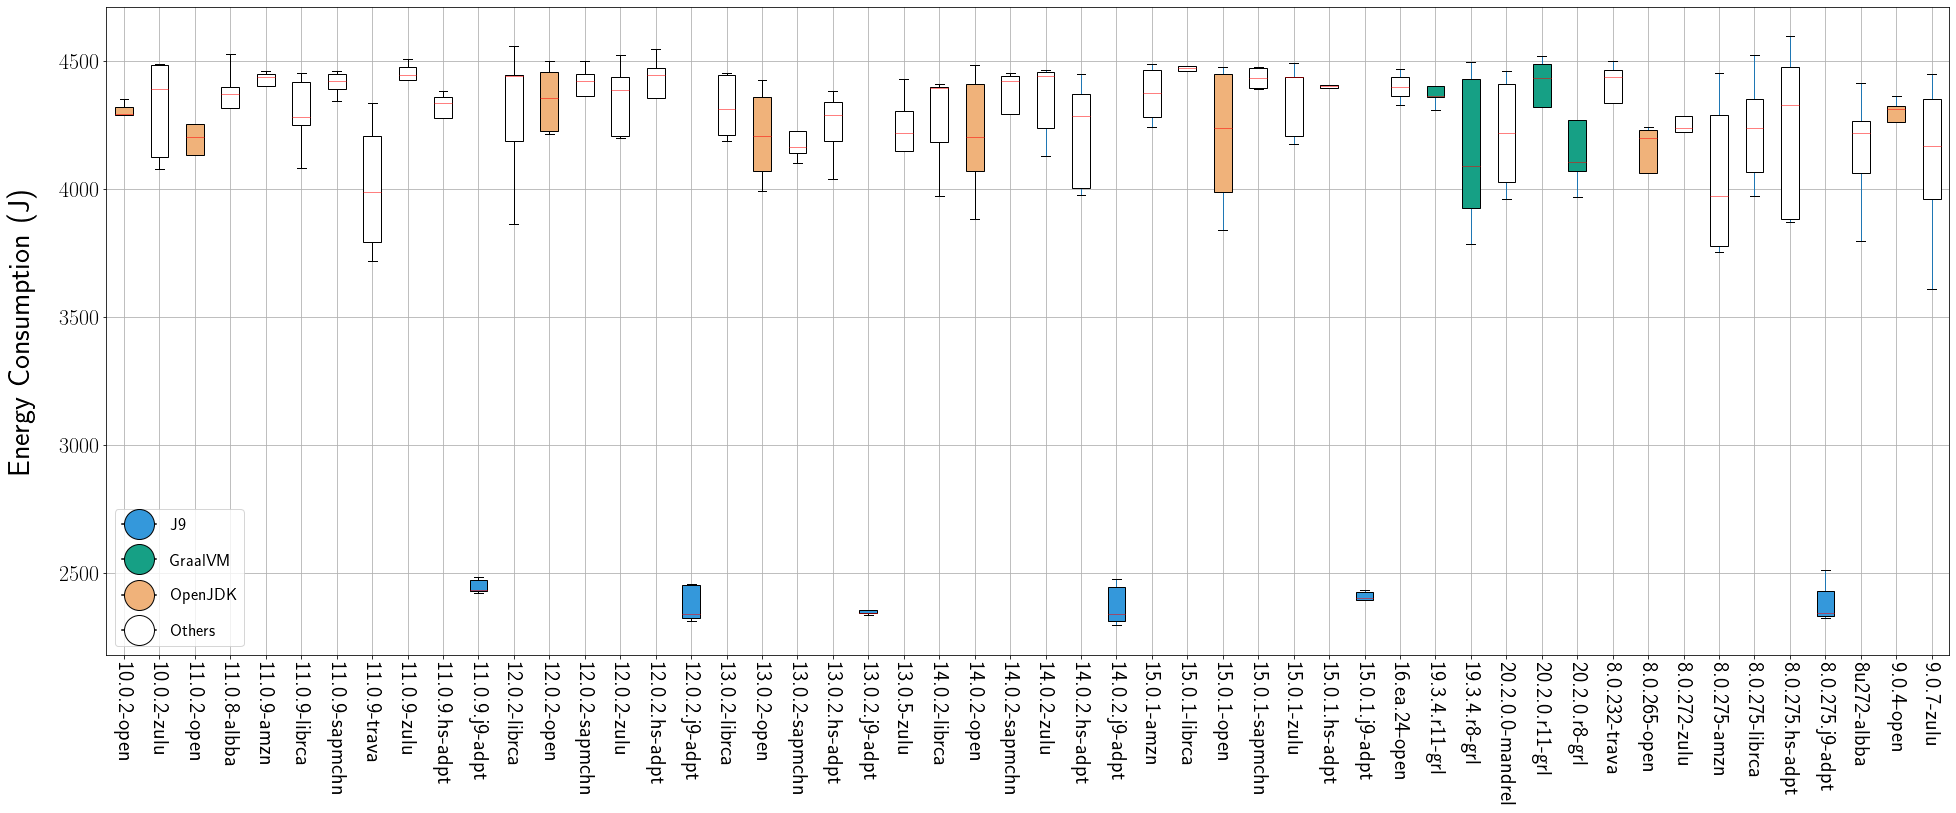

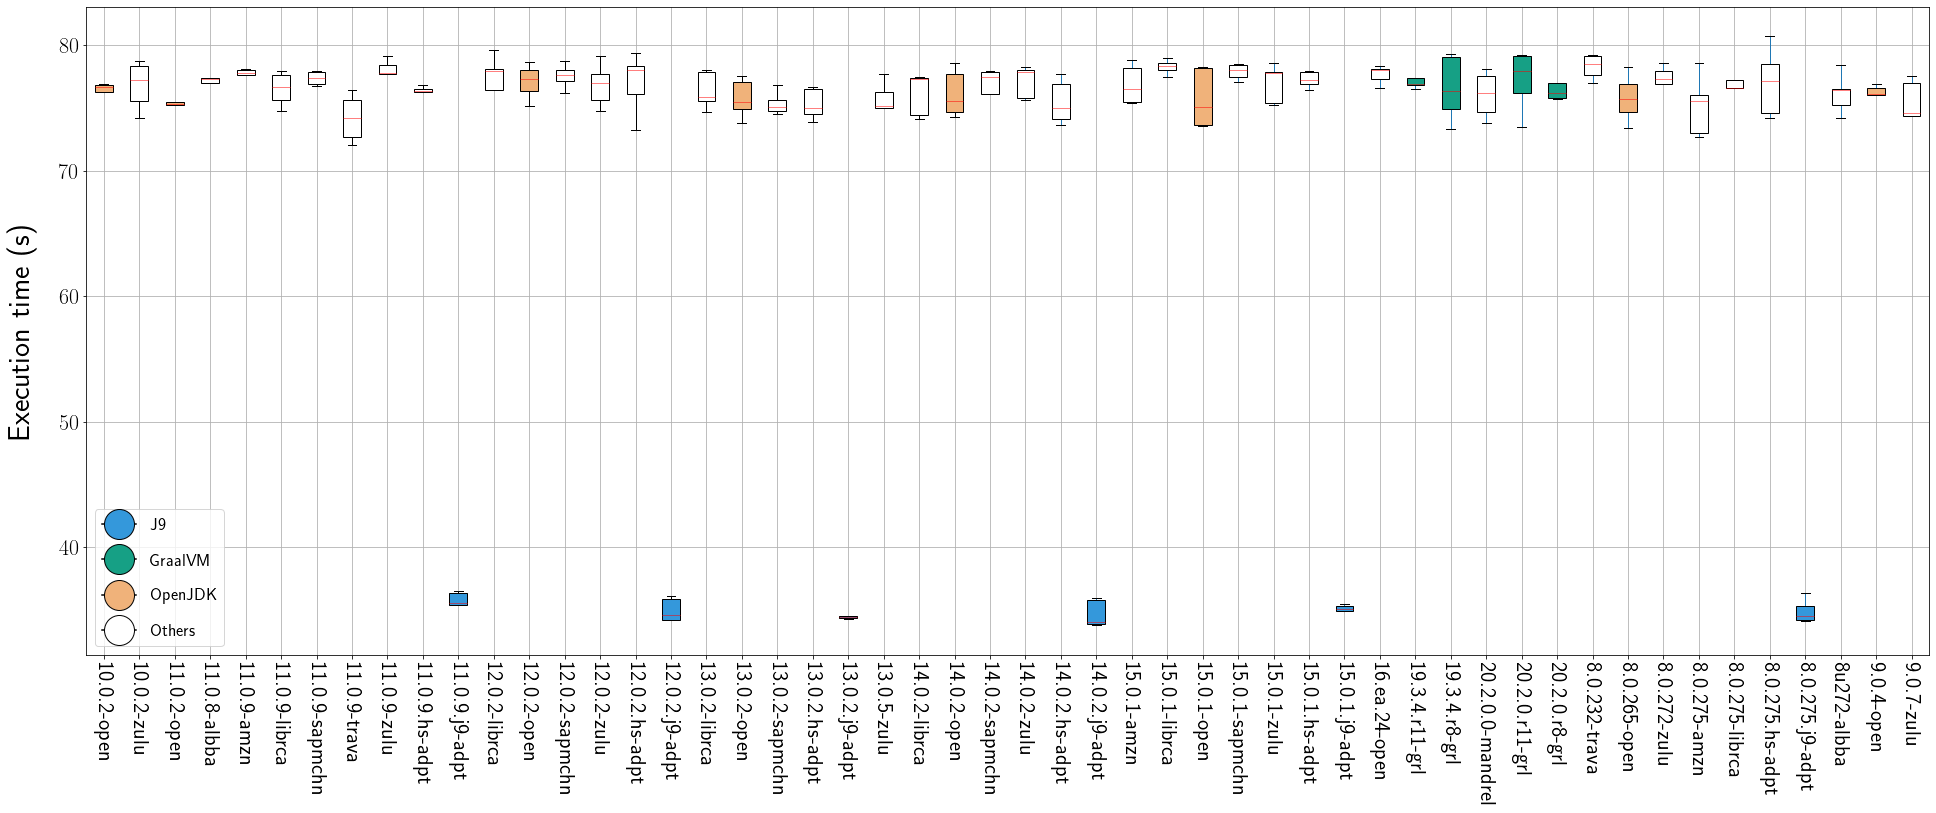

In [11]:
data=parse_log("report-gros.logs")
x=data.groupby(["benchmark","jvm"]).count()
# show(x)
data["benchmark"].unique()

array(['avrora', 'als'], dtype=object)

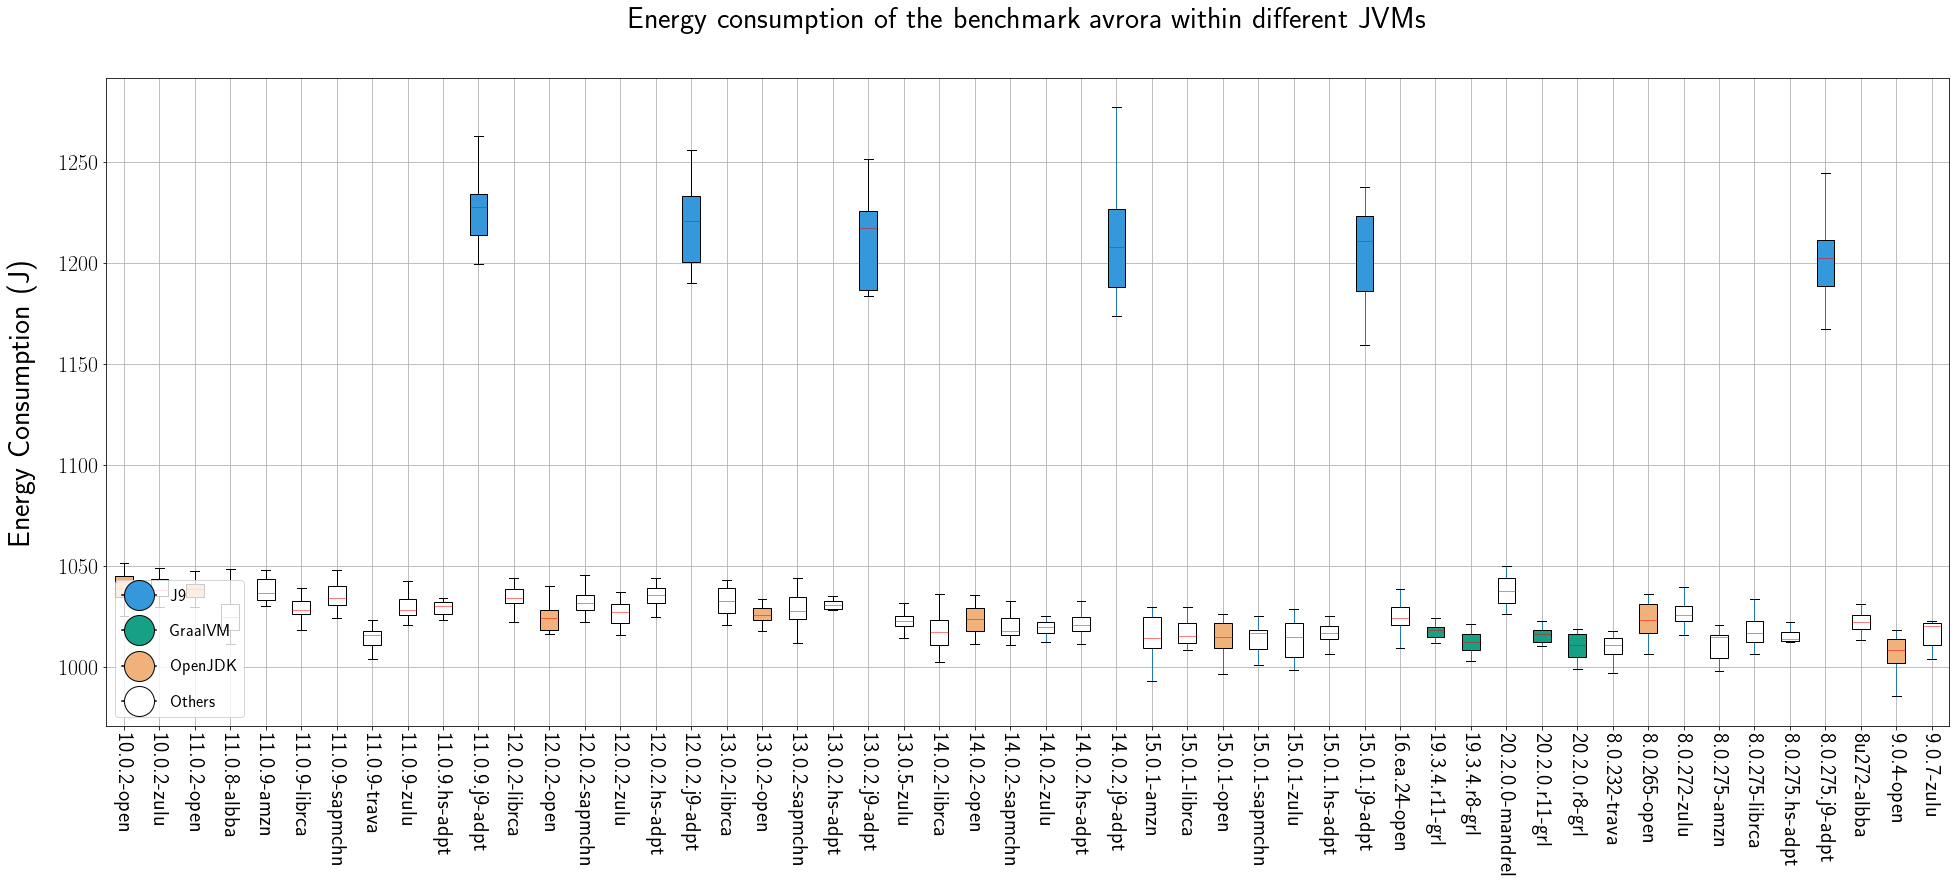

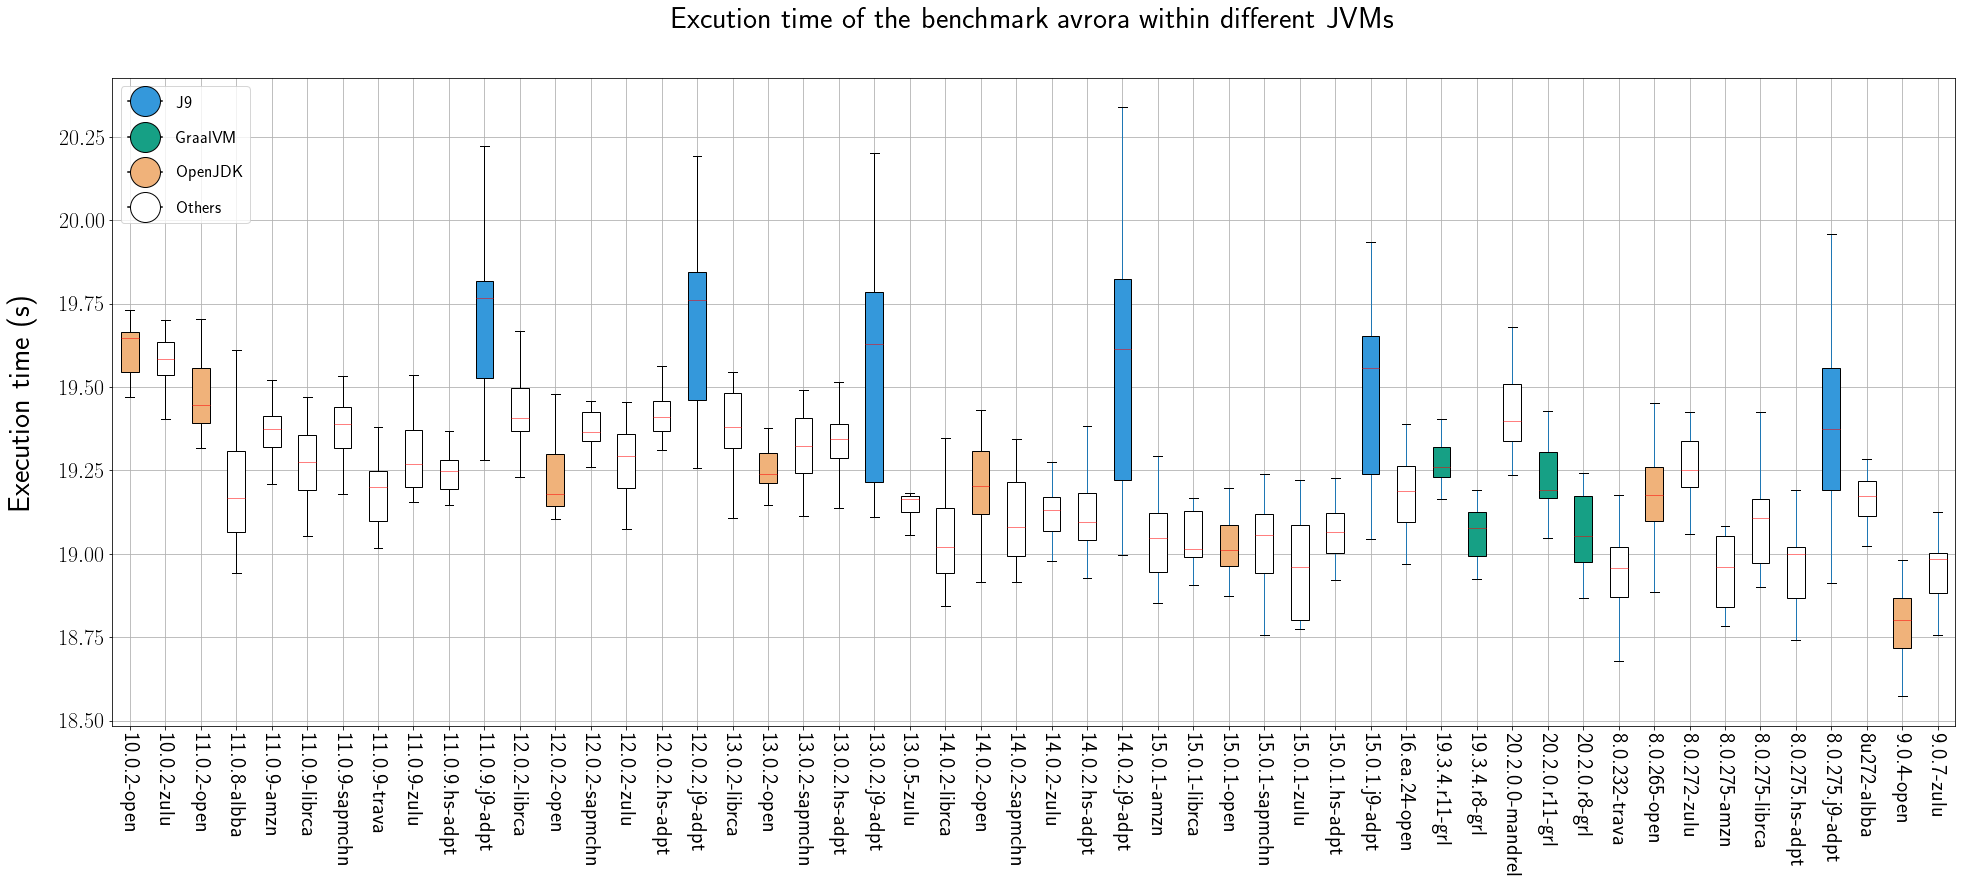

In [12]:
_=plot_pkg_energy(data,"avrora")
_=plot_execution_time(data,"avrora")


In [22]:
pd.options.plotting.backend ='plotly'
data=parse_log("report-scrable-chetemi-8.logs")
# x=x.reset_index()
# fig.show()
for benchmark in data["benchmark"].unique(): 
    fig=data.loc[data["benchmark"]==benchmark].plot.scatter(x="execution_time",y="energy_pkg",color="jvm",title=benchmark)
    fig.show()

In [56]:
neo4j=parse_log("reportneo4j-2-chetemi-3.logs")
neo4j=neo4j.loc[np.locigalnot(neo4j["jvm"] in ["11.0.9-trava",])]

_=plot_pkg_energy(neo4j,"neo4j","chetemi3",True)
_=plot_execution_time(neo4j,"neo4j","chetemi3",True)

AttributeError: module 'numpy' has no attribute 'locigalnot'

In [57]:
data=neo4j


In [58]:
data["energy_pkg"]= data["energy_pkg"].apply(lambda row : None if row <60 else row )
data["execution_time"]= data["execution_time"].apply(lambda row : None if row <2 else row )
data=data.loc[data["jvm"]!="20.1.0.r11-grl"]

TypeError: box() got an unexpected keyword argument 'showfliers'

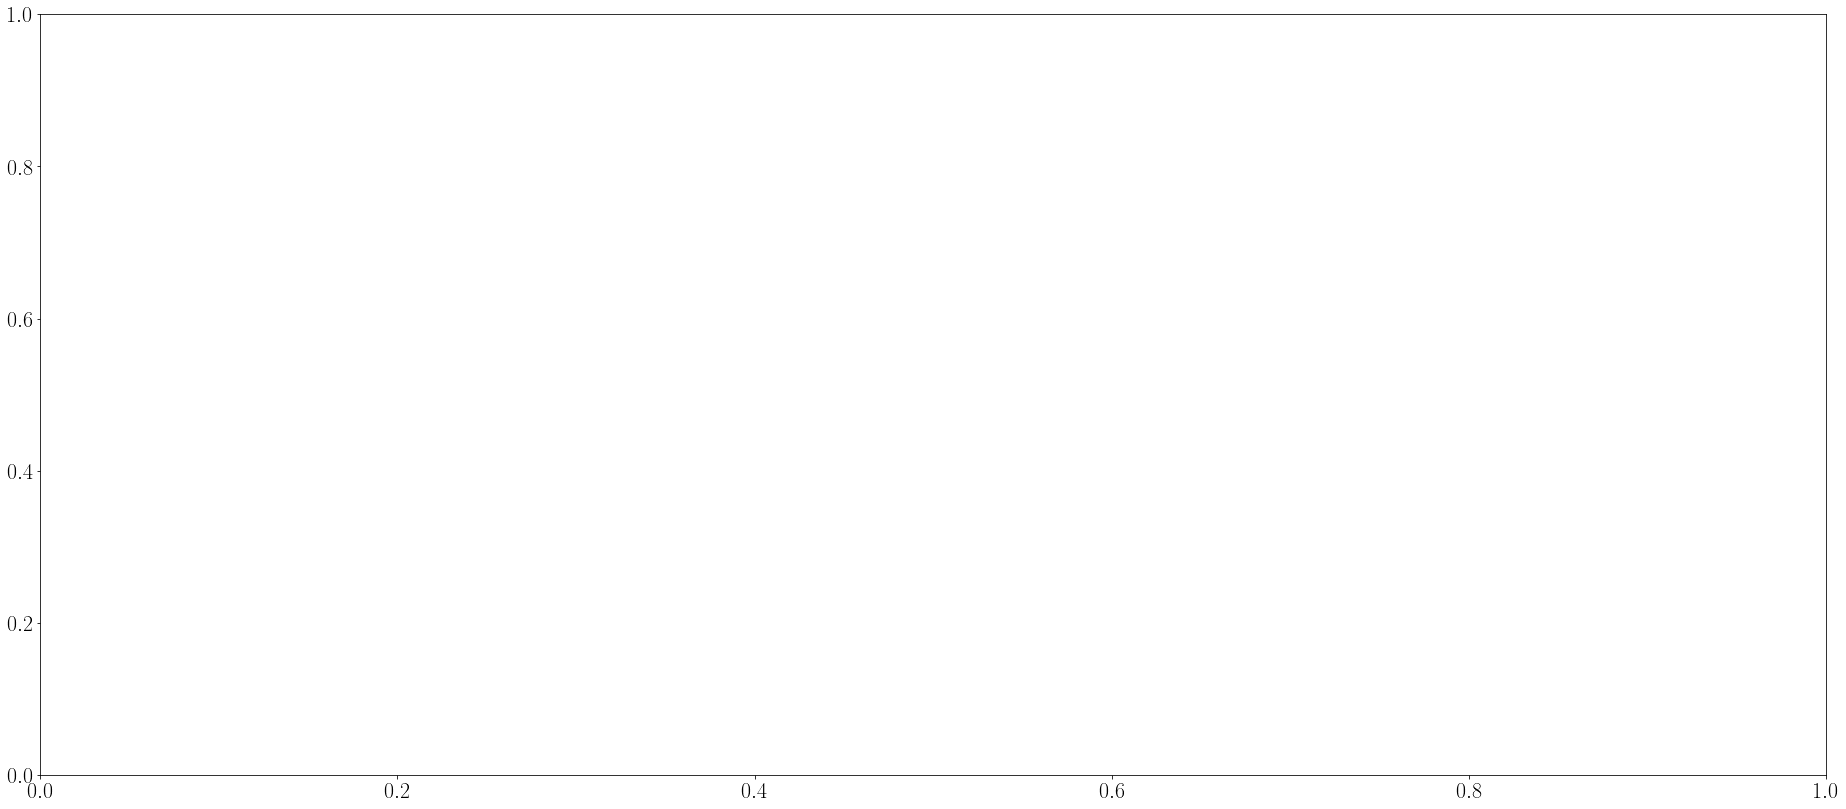

In [59]:
_=plot_pkg_energy(data,"neo4j","chetemi-3",True)

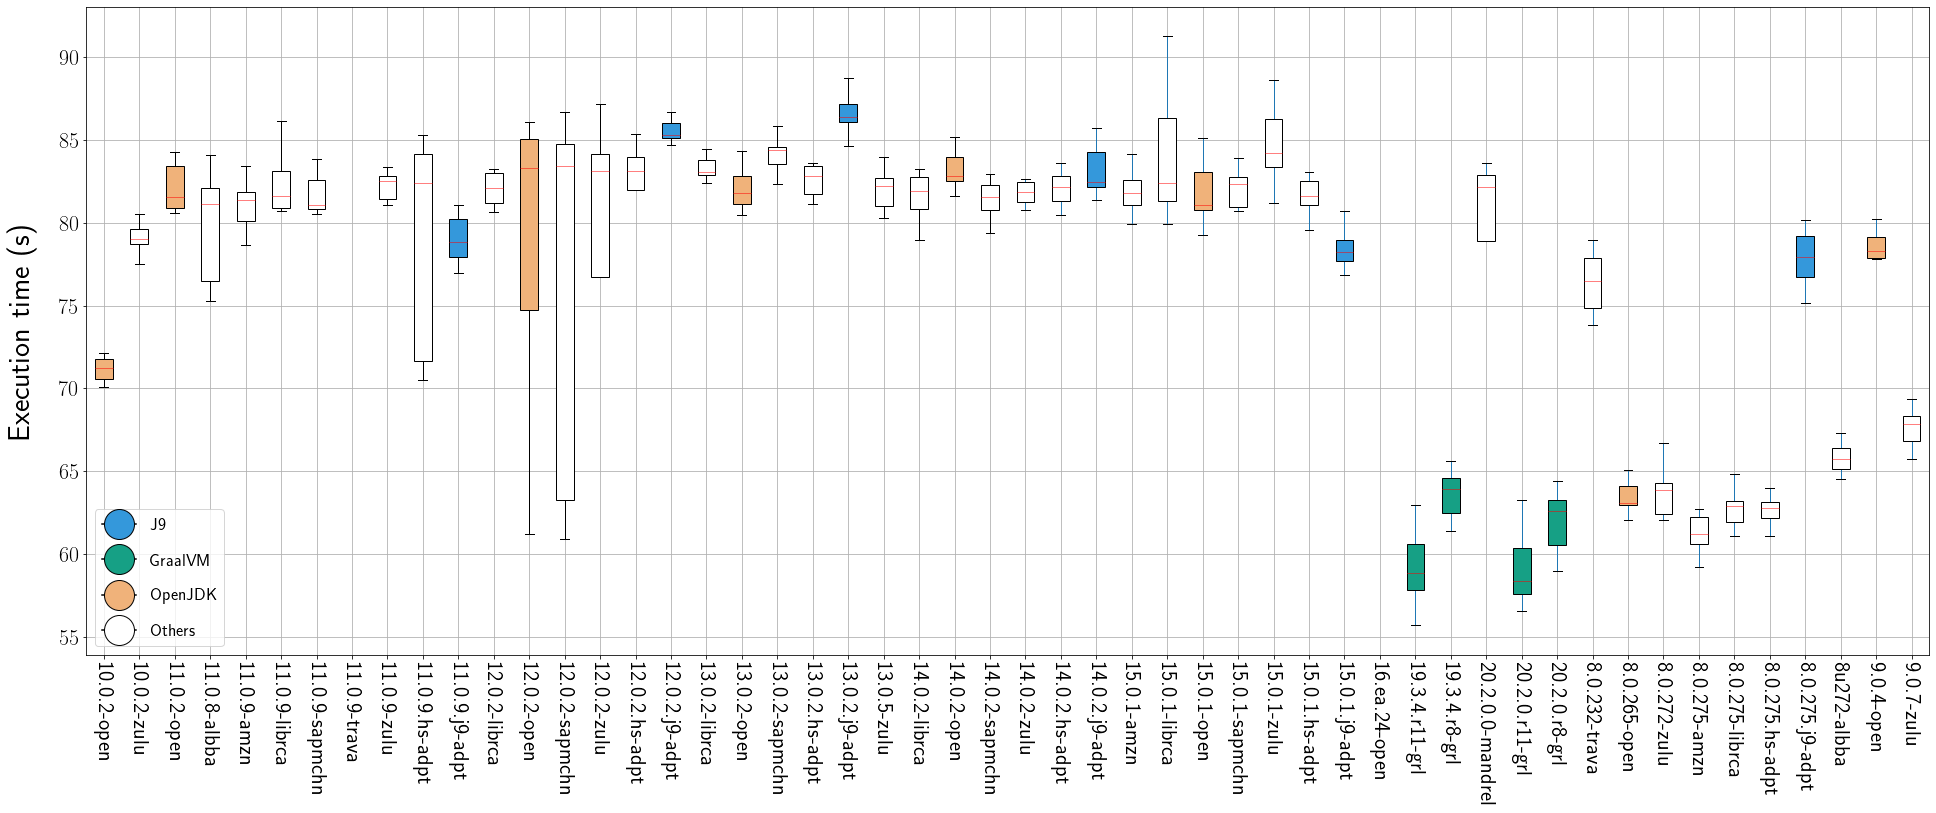

In [35]:
_=plot_execution_time(data,"neo4j","chetemi-3",True)

In [25]:
data=data_avrora
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [60]:
jvm_release_date={"15.0.1.j9-adpt" :"2020-10-20",
"15.0.1.hs-adpt" :"2020-10-20",
"14.0.2.j9-adpt" :"2020-07-14",
"14.0.2.hs-adpt" :"2020-07-14",
"13.0.2.j9-adpt" :"2020-01-14",
"13.0.2.hs-adpt" :"2020-01-14",
"12.0.2.j9-adpt" :"2019-07-16",
"12.0.2.hs-adpt" :"2019-07-16",
"11.0.9.j9-adpt" :"2020-10-20",
"11.0.9.hs-adpt" :"2020-11-04",
"11.0.8-albba" :"2020-07-14",
"8u272-albba" :"2020-11-12",
"15.0.1-amzn" :"2020-10-20",
"11.0.9-amzn" :"2020-11-04",
"15.0.1-zulu" :"2020-10-20",
"14.0.2-zulu" :"2020-07-14",
"13.0.5-zulu" :"2020-10-20",
"12.0.2-zulu" :"2019-07-16",
"11.0.9-zulu" :"2020-10-20",
"10.0.2-zulu" :"2018-07-17",
"15.0.1-librca" :"2020-10-20",
"14.0.2-librca" :"2020-07-14",
"13.0.2-librca" :"2020-01-15",
"12.0.2-librca" :"2019-07-16",
"11.0.9-librca" :"2020-11-04",
"20.2.0.r11-grl" :"2020-07-14",
"20.1.0.r11-grl" :"2020-04-14",
"19.3.4.r11-grl" :"2020-10-20",
"15.0.1-open" :"2020-10-20",
"14.0.2-open" :"2020-07-14",
"13.0.2-open" :"2020-01-14",
"12.0.2-open" :"2019-07-16",
"11.0.2-open" :"2019-01-15",
"10.0.2-open" :"2018-07-17",
"20.2.0.0-mandrel" :"2020-10-20",
"15.0.1-sapmchn" :"2020-10-22",
"14.0.2-sapmchn" :"2020-07-16",
"13.0.2-sapmchn" :"2020-01-16",
"12.0.2-sapmchn" :"2019-07-17",
"11.0.9-sapmchn" :"2020-11-05",
"11.0.9-trava" :"2020-10-20",
"8.0.232-trava" :"2019-11-10",
"8.0.275.j9-adpt" :"2020-11-10",
"8.0.275.hs-adpt" :"2020-11-10",
"8.0.275-amzn" :"2020-11-06",
"8.0.272-zulu" :"2020-11-06",
"9.0.4-open" :"2018-01-16",
"9.0.7-zulu" :"2018-01-16",
"20.2.0.r8-grl" :"2020-08-18",
"19.3.4.r8-grl" :"2020-11-03",
"8.0.275-librca" :"2020-11-06",
"8.0.265-open" :"2020-10-14",
"16.ea.24-open" :"2020-08-26"}

In [55]:
data=parse_log("reports-chetemi8.logs")
data["version"]=data["jvm"].apply(lambda x: jvm_versions[x])
data=data.groupby(["jvm","version","benchmark"])["energy_pkg"].mean().reset_index()
data["vendor"]=data["jvm"].apply(lambda x: "".join(x.split(".")[-1].split("-")[1:]))
data.head()

KeyError: '16.ea.24-open'

In [44]:
pd.options.plotting.backend ='plotly'
data.plot(kind="scatter",color="vendor",x="version",y="energy_pkg")

In [40]:
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [62]:
all_data=parse_log("reportchetemi-8-all-chetemi-8.logs")
all_data=all_data.loc[all_data["jvm"]!="16.ea.24-open"]
data=all_data.copy()
data["version"]=data["jvm"].apply(lambda x: jvm_versions[x])
data=data.groupby(["jvm","version","benchmark"])["energy_pkg"].mean().reset_index()
data["distribution"]=data["jvm"].apply(lambda x:jvm_distribution[x])
data.head()

KeyError: '20.1.0.r11-grl'

In [63]:
list(all_data.benchmark.unique())

['avrora',
 'h2',
 'lusearch',
 'lusearch-fix',
 'pmd',
 'sunflow',
 'als',
 'dotty',
 'fj-kmeans',
 'neo4j',
 'philosopher',
 'reactors',
 'scrabble']

In [64]:
data.head()

,jvm,version,benchmark,energy_pkg
0,10.0.2-open,10,als,12208.66625
1,10.0.2-open,10,avrora,3979.53375
2,10.0.2-open,10,dotty,2955.60125
3,10.0.2-open,10,fj-kmeans,3661.38750
4,10.0.2-open,10,h2,1900.43875


In [65]:
pd.options.plotting.backend ='plotly'
for bench in list(data.benchmark.unique()) : 
    fig=data.loc[data["benchmark"]==bench].plot(kind="scatter",color="distribution",x="version",y="energy_dram",title=bench)
    fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['jvm', 'version', 'benchmark', 'energy_pkg'] but received: energy_dram

In [44]:
pd.options.plotting.backend ='plotly'
for bench in list(data.benchmark.unique()) : 
    fig=data.loc[data["benchmark"]==bench].plot(kind="scatter",color="distribution",x="version",y="av_power_pkg",title=bench)
    fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['jvm', 'benchmark', 'iteration', 'energy_pkg', 'energy_core', 'energy_dram', 'execution_time', 'av_power_pkg'] but received: version

In [603]:
pd.options.plotting.backend ='plotly'
for bench in list(data.benchmark.unique()) : 
    fig=data.loc[data["benchmark"]==bench].plot(kind="scatter",color="distribution",x="version",y="energy_pkg",title=bench)
    fig.show()

In [114]:
means=data.groupby("benchmark").sum()
data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/means.loc[row["benchmark"]]*100,axis=1)

In [115]:
data1=data.groupby(["jvm","vendor","version"]).sum().reset_index()

In [116]:
data1.plot(kind="scatter",color="vendor",x="version",y="relative_energy",title="relative energy %")

In [117]:
data1.plot(kind="scatter",color="vendor",x="version",y="energy_pkg",title="absolute energy Joules")

In [125]:
show(all_data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [53]:
jvm_versions={
"15.0.1.j9-adpt":15,
"15.0.1.hs-adpt":15,
"14.0.2.j9-adpt":14,
"14.0.2.hs-adpt":14,
"13.0.2.j9-adpt":13,
"13.0.2.hs-adpt":13,
"12.0.2.j9-adpt":12,
"12.0.2.hs-adpt":12,
"11.0.9.j9-adpt":11,
"11.0.9.hs-adpt":11,
"8.0.275.j9-adpt":8,
"8.0.275.hs-adpt":8,
"11.0.8-albba":11,
"8u272-albba":8,
"15.0.1-amzn":15,
"11.0.9-amzn":11,
"8.0.275-amzn":8,
"15.0.1-zulu":15,
"14.0.2-zulu":14,
"13.0.5-zulu":13,
"12.0.2-zulu":12,
"11.0.9-zulu":11,
"10.0.2-zulu":10,
"9.0.7-zulu":9,
"8.0.272-zulu":8,
"15.0.1-librca":15,
"14.0.2-librca":14,
"13.0.2-librca":13,
"12.0.2-librca":12,
"11.0.9-librca":11,
"8.0.275-librca":8,
"20.2.0.r11-grl":11,
"20.1.0.r11-grl":11,    
"20.2.0.r8-grl":8,
"19.3.4.r11-grl":11,
"19.3.4.r8-grl":8,
"20.2.0.0-mandrel":11,
"15.0.1-open":15,
"14.0.2-open":14,
"13.0.2-open":13,
"12.0.2-open":12,
"11.0.2-open":11,
"10.0.2-open":10,
"9.0.4-open":9,
"8.0.265-open":8,
"15.0.1-sapmchn":15,
"14.0.2-sapmchn":14,
"13.0.2-sapmchn":13,
"12.0.2-sapmchn":12,
"11.0.9-sapmchn":11,
"11.0.9-trava":11,
"8.0.232-trava":8,

}

In [160]:
data["version"]=data["jvm"].apply(lambda x: jvm_versions[x])
fig=data.loc[data["benchmark"]=="als"].plot(kind="scatter",color="distribution",x="version",y="energy_pkg",title="absolute energy Joules")

In [587]:
data.distribution.unique()

array(['open', 'zulu', 'albba', 'amzn', 'librca', 'sapmchn', 'trava',
       'hs-adpt', 'j9-adpt', 'grl-19', 'mandrel', 'grl-20'], dtype=object)

In [95]:
jvm_colors={
'open' : "#0d0887",
'zulu' : "#46039f",
'albba' : "#7201a8",
'amzn' : "#9c179e",
'librca' : "#bd3786",
'sapmchn' : "#d8576b",
'trava' : "#ed7953",
'hs-adpt' : "#fb9f3a",
'j9-adpt' : "#3498DB""",
'mandrel' :"#fdca26",
"grl-20":"#16A085" ,
"grl-19":"#f0f921",
}

jvm_patterns={
'open' : "-",
'zulu' : "-",
'albba' : "-",
'amzn' : "-",
'librca' : "-",
'sapmchn' : "-",
'trava' : "-",
'hs-adpt' : "-",
'j9-adpt' : "--",
'grl-' : "-",
'mandrel' :"-.",
"grl-20.2":"-." ,
"grl-20.1": "-." ,
"grl-20.2":"-.",
"grl-19.3":"-.",
"grl-19.3":"-.",
"mandrel-20.2":"-.",
}

jvm_labels={
'open' : 'HotSpot' ,
'zulu' : 'Zulu' ,
'albba' : 'Dragonwell (LTS)' ,
'amzn' : 'Corretto (MJR)' ,
'librca' : 'Librca' ,
'sapmchn' : 'SapMachine' ,
'trava' : 'HotSpotTrava (LTS)' ,
'hs-adpt' : 'HotSpotAdopt' ,
'j9-adpt' : 'OpenJ9' ,
'grl-19' : 'GraalVM-19 (LTS)' ,
'mandrel' : 'Mandrel' ,
'grl-20' : 'GraalVM-20 (LTS)',
    }

In [66]:
jvm_versions={
    "15.0.1.j9-adpt":15,
"15.0.1.hs-adpt":15,
"14.0.2.j9-adpt":14,
"14.0.2.hs-adpt":14,
"13.0.2.j9-adpt":13,
"13.0.2.hs-adpt":13,
"12.0.2.j9-adpt":12,
"12.0.2.hs-adpt":12,
"11.0.9.j9-adpt":11,
"11.0.9.hs-adpt":11,
"8.0.275.j9-adpt":8,
"8.0.275.hs-adpt":8,
"11.0.8-albba":11,
"8u272-albba":8,
"15.0.1-amzn":15,
"11.0.9-amzn":11,
"8.0.275-amzn":8,
"15.0.1-zulu":15,
"14.0.2-zulu":14,
"13.0.5-zulu":13,
"12.0.2-zulu":12,
"11.0.9-zulu":11,
"10.0.2-zulu":10,
"9.0.7-zulu":9,
"8.0.272-zulu":8,
"15.0.1-librca":15,
"14.0.2-librca":14,
"13.0.2-librca":13,
"12.0.2-librca":12,
"11.0.9-librca":11,
"8.0.275-librca":8,
"20.2.0.r11-grl":11,
"20.1.0.r11-grl":11,    
"20.2.0.r8-grl":8,
"19.3.4.r11-grl":11,
"19.3.4.r8-grl":8,
"20.2.0.0-mandrel":11,
"15.0.1-open":15,
"14.0.2-open":14,
"13.0.2-open":13,
"12.0.2-open":12,
"11.0.2-open":11,
"10.0.2-open":10,
"9.0.4-open":9,
"8.0.265-open":8,
"15.0.1-sapmchn":15,
"14.0.2-sapmchn":14,
"13.0.2-sapmchn":13,
"12.0.2-sapmchn":12,
"11.0.9-sapmchn":11,
"11.0.9-trava":11,
"8.0.232-trava":8,

}

In [50]:
jvm_distribution={
"15.0.1.j9-adpt":"j9-adpt",
"15.0.1.hs-adpt":"hs-adpt",
"14.0.2.j9-adpt":"j9-adpt",
"14.0.2.hs-adpt":"hs-adpt",
"13.0.2.j9-adpt":"j9-adpt",
"13.0.2.hs-adpt":"hs-adpt",
"12.0.2.j9-adpt":"j9-adpt",
"12.0.2.hs-adpt":"hs-adpt",
"11.0.9.j9-adpt":"j9-adpt",
"11.0.9.hs-adpt":"hs-adpt",
"8.0.275.j9-adpt":"j9-adpt",
"8.0.275.hs-adpt":"hs-adpt",
"11.0.8-albba":"albba",
"8u272-albba":"albba",
"15.0.1-amzn":"amzn",
"11.0.9-amzn":"amzn",
"8.0.275-amzn":"amzn",
"15.0.1-zulu":"zulu",
"14.0.2-zulu":"zulu",
"13.0.5-zulu":"zulu",
"12.0.2-zulu":"zulu",
"11.0.9-zulu":"zulu",
"10.0.2-zulu":"zulu",
"9.0.7-zulu":"zulu",
"8.0.272-zulu":"zulu",
"15.0.1-librca":"librca",
"14.0.2-librca":"librca",
"13.0.2-librca":"librca",
"12.0.2-librca":"librca",
"11.0.9-librca":"librca",
"8.0.275-librca":"librca",
"20.2.0.r11-grl":"grl-20", 
"20.2.0.r8-grl":"grl-20",
"19.3.4.r11-grl":"grl-19",
"19.3.4.r8-grl":"grl-19",
"20.2.0.0-mandrel":"mandrel",
"15.0.1-open":"open",
"14.0.2-open":"open",
"13.0.2-open":"open",
"12.0.2-open":"open",
"11.0.2-open":"open",
"10.0.2-open":"open",
"9.0.4-open":"open",
"8.0.265-open":"open",
"15.0.1-sapmchn":"sapmchn",
"14.0.2-sapmchn":"sapmchn",
"13.0.2-sapmchn":"sapmchn",
"12.0.2-sapmchn":"sapmchn",
"11.0.9-sapmchn":"sapmchn",
"11.0.9-trava":"trava",
"8.0.232-trava":"trava",

}

In [79]:
jvm_labels={
"15.0.1.j9-adpt":"j9-adpt",
"15.0.1.hs-adpt":"hs-adpt",
"14.0.2.j9-adpt":"j9-adpt",
"14.0.2.hs-adpt":"hs-adpt",
"13.0.2.j9-adpt":"j9-adpt",
"13.0.2.hs-adpt":"hs-adpt",
"12.0.2.j9-adpt":"j9-adpt",
"12.0.2.hs-adpt":"hs-adpt",
"11.0.9.j9-adpt":"j9-adpt",
"11.0.9.hs-adpt":"hs-adpt",
"8.0.275.j9-adpt":"j9-adpt",
"8.0.275.hs-adpt":"hs-adpt",
"11.0.8-albba":"albba (LTS)",
"8u272-albba":"albba (LTS)",
"15.0.1-amzn":"amzn",
"11.0.9-amzn":"amzn",
"8.0.275-amzn":"amzn",
"15.0.1-zulu":"zulu",
"14.0.2-zulu":"zulu",
"13.0.5-zulu":"zulu",
"12.0.2-zulu":"zulu",
"11.0.9-zulu":"zulu",
"10.0.2-zulu":"zulu",
"9.0.7-zulu":"zulu",
"8.0.272-zulu":"zulu",
"15.0.1-librca":"librca",
"14.0.2-librca":"librca",
"13.0.2-librca":"librca",
"12.0.2-librca":"librca",
"11.0.9-librca":"librca",
"8.0.275-librca":"librca",
"20.2.0.r11-grl":"grl-20 (LTS)", 
"20.2.0.r8-grl":"grl-20 (LTS)",
"19.3.4.r11-grl":"grl-19 (LTS)",
"19.3.4.r8-grl":"grl-19 (LTS)",
"20.2.0.0-mandrel":"mandrel (LTS)",
"15.0.1-open":"open",
"14.0.2-open":"open",
"13.0.2-open":"open",
"12.0.2-open":"open",
"11.0.2-open":"open",
"10.0.2-open":"open",
"9.0.4-open":"open",
"8.0.265-open":"open",
"15.0.1-sapmchn":"sapmchn",
"14.0.2-sapmchn":"sapmchn",
"13.0.2-sapmchn":"sapmchn",
"12.0.2-sapmchn":"sapmchn",
"11.0.9-sapmchn":"sapmchn",
"11.0.9-trava":"trava (LTS)",
"8.0.232-trava":"trava (LTS)",
}

<ipython-input-82-5de8d12580c1>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



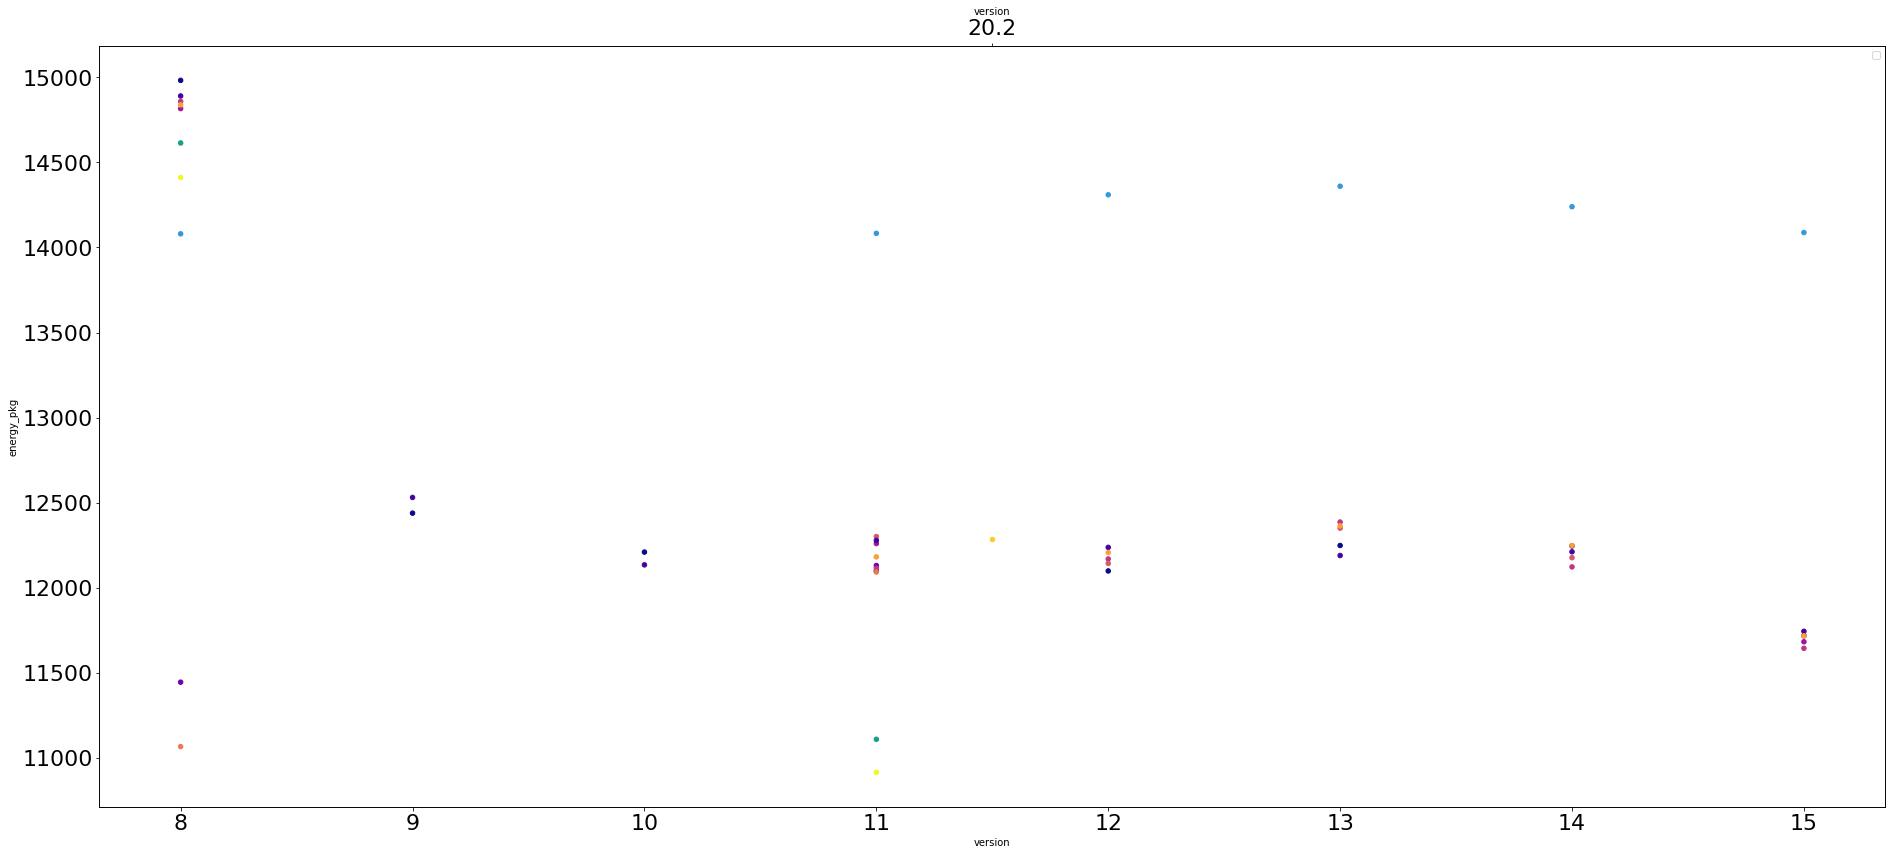

In [82]:
pd.options.plotting.backend ='matplotlib'
fig = plt.figure( figsize=(32, 14))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
df=data.loc[data["benchmark"]=="als"]
df2=df.loc[np.logical_or(df["distribution"]=="grl",df["distribution"] =="mandrel") ]
df2["version"]=df2["jvm"].apply(lambda x:".".join(x.split(".")[:2]))
# df2=df.loc[df["is-graal"]]
df1=df.loc[np.logical_and(df["distribution"]!="grl",df["distribution"] !="mandrel") ]
ax1.legend(jvm_colors.keys())
df1.plot(kind="scatter",x="version",c=df1['distribution'].map(jvm_colors),y="energy_pkg",ax=ax1,legend=True)
df2.plot(kind="scatter",x="version",c=df2['distribution'].map(jvm_colors),y="energy_pkg",ax=ax2,legend=True)

plt.show()

In [83]:
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [556]:
# data=data.groupby(["jvm","version","benchmark"])["energy_pkg"].mean().reset_index()
means=data.groupby("benchmark").mean()
data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/means.loc[row["benchmark"]]*100,axis=1)
data2=data.groupby(["jvm","version"])["energy_pkg"].sum().reset_index()

In [291]:
show(data2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [85]:
data=parse_log("reportchetemi-8-all-chetemi-8.logs")
data=data.loc[np.logical_not(data["jvm"].isin(["16.ea.24-open","20.1.0.r11-grl"]))]
data["version"]=data["jvm"].apply(lambda x: jvm_versions[x])
data["distribution"]=data["jvm"].apply(lambda x: jvm_distribution[x])
data=data.groupby(["benchmark","jvm","version","distribution"]).mean().reset_index()
data.head()

,benchmark,jvm,version,distribution,iteration,energy_pkg,energy_core,energy_dram,execution_time,av_power_pkg
0,als,10.0.2-open,10,open,4.5,12208.66625,0.0,2561.72625,177.336228,68.846282
1,als,10.0.2-zulu,10,zulu,4.5,12133.48250,0.0,2552.05000,176.717264,68.659964
2,als,11.0.2-open,11,open,4.5,12097.62125,0.0,2529.06625,175.910419,68.777501
3,als,11.0.8-albba,11,albba,4.5,12129.76875,0.0,2531.75250,175.906857,68.956827
4,als,11.0.9-amzn,11,amzn,4.5,12258.66375,0.0,2550.88250,177.408835,69.102974


In [97]:
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

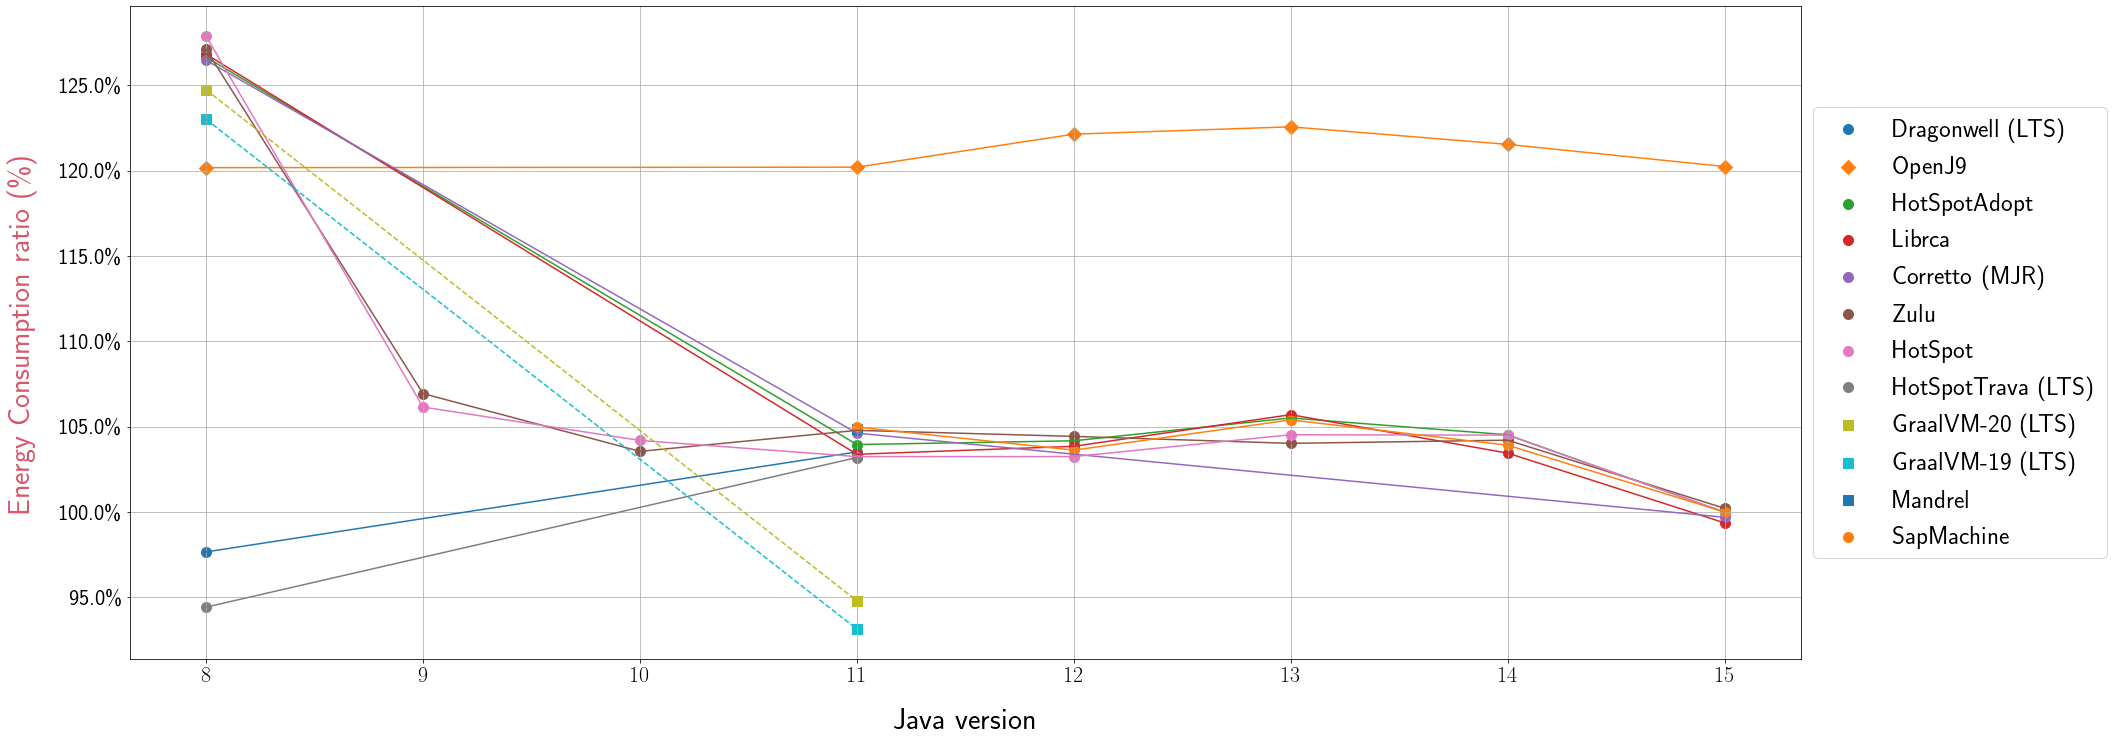

In [100]:
means=data.groupby("benchmark").mean()["energy_pkg"]
# data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/means.loc[row["benchmark"]]*100,axis=1)
data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/data.loc[np.logical_and(data["jvm"]=="15.0.1-open",data["benchmark"]==row["benchmark"])]["energy_pkg"]*100,axis=1)
data2=data.loc[data["execution_time"] > 4]
data2=data2.groupby(["jvm","version","distribution"])["relative_energy"].mean().reset_index()
data2=data2.sort_values("version")
pd.options.plotting.backend ='matplotlib'
fig, axes = plt.subplots(1,1, figsize=(32, 12))
# ax2=axes.twin()
for i in data2["distribution"].unique() : 
    x= data2.loc[data2["distribution"]==i]
    if "grl" in i  or i=="mandrel" : 
        pattern="--"
        scatter_mark="s"
    elif "j9" in i : 
        pattern = "-"
        scatter_mark="D"
    else :
        pattern="-"
        scatter_mark="o"
        
    axes.plot(x["version"],x["relative_energy"],pattern)
    axes.scatter(x["version"],x["relative_energy"],s=100,marker=scatter_mark,label=jvm_labels[i])
    
axes.legend(fontsize=25,loc='center left', bbox_to_anchor=(1.0, 0.5),)
axes.grid("True" )
axes.set_ylabel(ylabel="Energy Consumption ratio (\%)",labelpad=22,color =jvm_colors[i],fontsize="30")
axes.set_xlabel(xlabel="Java version ",labelpad=22,fontsize="30")
axes.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
# axes.set_facecolor('#99a5ad')
plt.subplots_adjust(right=0.85)
plt.savefig(f"alljvms_chetemi8_baseon15.pdf",format="pdf")

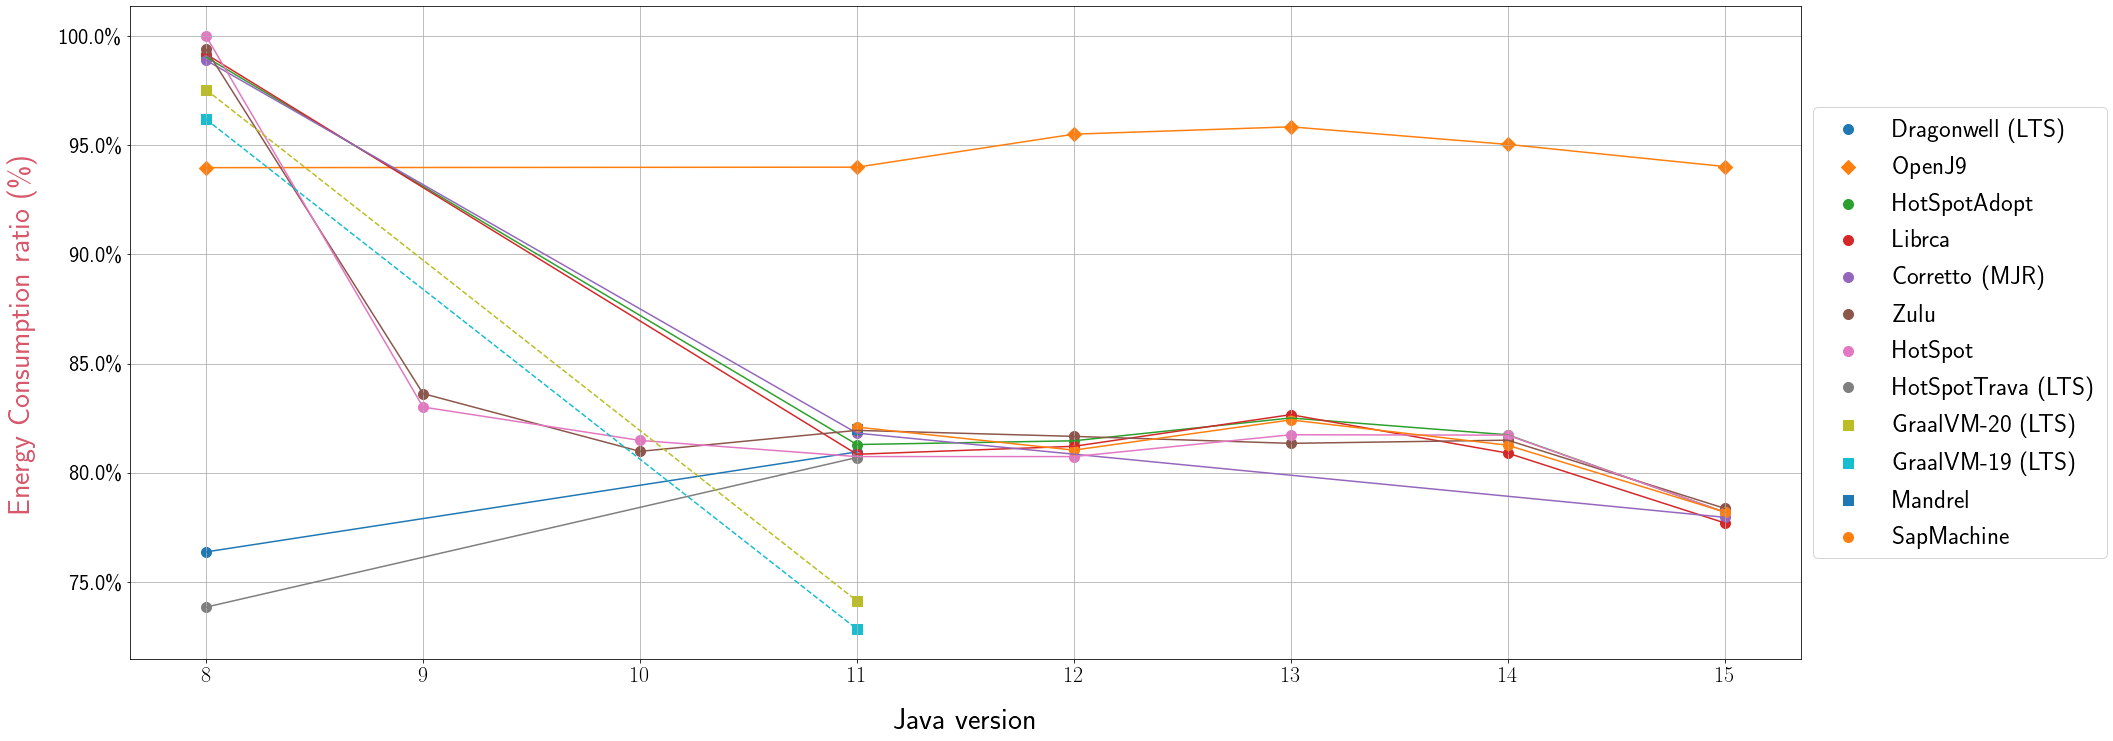

In [98]:
means=data.groupby("benchmark").mean()["energy_pkg"]
# data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/means.loc[row["benchmark"]]*100,axis=1)
data["relative_energy"]=data.apply(lambda row : row["energy_pkg"]/data.loc[np.logical_and(data["jvm"]=="8.0.265-open",data["benchmark"]==row["benchmark"])]["energy_pkg"]*100,axis=1)
data2=data.loc[data["execution_time"] > 4]
data2=data2.groupby(["jvm","version","distribution"])["relative_energy"].mean().reset_index()
data2=data2.sort_values("version")
pd.options.plotting.backend ='matplotlib'
fig, axes = plt.subplots(1,1, figsize=(32, 12))
# ax2=axes.twin()
for i in data2["distribution"].unique() : 
    x= data2.loc[data2["distribution"]==i]
    if "grl" in i  or i=="mandrel" : 
        pattern="--"
        scatter_mark="s"
    elif "j9" in i : 
        pattern = "-"
        scatter_mark="D"
    else :
        pattern="-"
        scatter_mark="o"
        
    axes.plot(x["version"],x["relative_energy"],pattern)
    axes.scatter(x["version"],x["relative_energy"],s=100,marker=scatter_mark,label=jvm_labels[i])
    
axes.legend(fontsize=25,loc='center left', bbox_to_anchor=(1.0, 0.5),)
axes.grid("True" )
axes.set_ylabel(ylabel="Energy Consumption ratio (\%)",labelpad=22,color =jvm_colors[i],fontsize="30")
axes.set_xlabel(xlabel="Java version ",labelpad=22,fontsize="30")
axes.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
# axes.set_facecolor('#99a5ad')
plt.subplots_adjust(right=0.85)
plt.savefig(f"alljvms_chetemi8_baseon8.pdf",format="pdf")

In [369]:
data.loc[data["execution_time"] > 4].benchmark.unique()

array(['als', 'avrora', 'dotty', 'fj-kmeans', 'h2', 'neo4j', 'pmd',
       'reactors', 'scrabble', 'sunflow'], dtype=object)

In [372]:
data.loc[data["execution_time"] < 4].benchmark.unique()

array(['lusearch', 'lusearch-fix', 'philosopher'], dtype=object)

In [601]:
show(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [4]:
bare = parse_log("reportbare1-chetemi-8.logs")

In [5]:
show(bare)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
pd.options.plotting.backend ='plotly'
for bench in list(bare.benchmark.unique()) : 
    fig=bare.loc[bare["benchmark"]==bench].plot(kind="box",color="jvm",x="jvm",y="energy_pkg",title=bench)
    fig.show()